<a href="https://colab.research.google.com/github/Phuong181003/ecommerce/blob/main/ecommerce_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ecommerce_dataset
!ls

/content/drive/MyDrive/Ecommerce_dataset
ecommerce_customer.csv	ecommerce_order.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_order = pd.read_csv("ecommerce_order.csv")
df_cus = pd.read_csv("ecommerce_customer.csv")

# CLEAN DATA



## CHECK NULL VALUE


**FOR ORDER DATA**

In [5]:
df_order

,additional_order_items,category_name,customer_id,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Camping & Hiking,Camping & Hiking,568,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Camping & Hiking,Camping & Hiking,3341,LATAM,18-04-2017,57472,South America,1,299.980011,-5.40%,-16.200001
2,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,3.90%,11.620000
3,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,-1.10%,-3.390000
4,Hunting & Shooting,Hunting & Shooting,10740,LATAM,5/6/2017,58644,Central America,1,149.990005,-63.80%,-95.650002
...,...,...,...,...,...,...,...,...,...,...,...
115741,Water Sports,Water Sports,2666,USCA,13-04-2016,32105,US Center,1,199.990005,27.50%,55.090000
115742,Shop By Sport,Shop By Sport,8100,USCA,7/2/2016,37555,East of USA,1,39.990002,37.40%,14.940000
115743,Fishing,Fishing,2666,USCA,13-04-2016,32105,US Center,1,399.980011,39.80%,159.350006
115744,Fishing,Fishing,9547,USCA,8/6/2016,39980,West of USA,1,399.980011,24.90%,99.599998




> The data in two columns 'additional_order_items' and 'category_name' look like nearly the same.
Check this assumption



In [6]:
df_order.isna().sum()

additional_order_items    1024
category_name                0
customer_id                  0
market                       0
order_date                   0
order_id                     0
order_region                 0
order_quantity               0
product_price                0
profit_margin                0
profit_per_order             0
dtype: int64

In [7]:
df_test = df_order[df_order["additional_order_items"] != df_order["category_name"]]

In [8]:
df_test["additional_order_items"].unique()

array([nan], dtype=object)

In [9]:
df_test["category_name"].unique()

array(['Accessories'], dtype=object)

In [10]:
len(df_test)

1024



> Data in 'additional_order_items' column have null 1024 rows are respectively with 1024 rows of "Accessories" in 'category_name' column. Thats why we can eliminate column 'additional_order_items' and use 'category_name' represent for both column



In [11]:
df_test.drop('additional_order_items',axis='columns', inplace=True)

<ipython-input-11-d8c4c10eb0f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('additional_order_items',axis='columns', inplace=True)


**FOR CUSTOMER DATA**

In [12]:
df_cus

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0
1,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0
2,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
3,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
4,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0
...,...,...,...,...,...,...,...
115741,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115742,Upland,United States,Victoria,8100,Corporate,CA,91786.0
115743,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115744,Los Angeles,United States,Mary,9547,Corporate,CA,90027.0


In [13]:
df_cus.isna().sum()

customer_city       0
customer_country    0
customer_fname      0
customer_id         0
customer_segment    0
customer_state      0
customer_zipcode    3
dtype: int64

In [14]:
df_cus[df_cus["customer_zipcode"].isna()]

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
21035,CA,United States,Zena,14046,Consumer,91732,NaN
34002,CA,United States,Eugenia,17171,Corporate,95758,NaN
50076,CA,United States,Sara,14577,Consumer,95758,NaN


In [15]:
df_cus["customer_state"].value_counts()

PR       44458
CA       18682
NY        7315
TX        5924
IL        4882
FL        3487
OH        2639
MI        2455
PA        2396
NJ        2070
AZ        1939
GA        1711
MD        1538
CO        1202
NC        1183
VA        1153
OR        1097
MA         995
NV         959
TN         942
MO         877
HI         806
NM         673
UT         658
CT         652
WA         637
LA         587
WI         575
MN         454
SC         433
IN         376
DC         330
KY         291
KS         289
DE         171
RI         170
WV         148
OK         135
ND         130
AR         100
ID          90
MT          53
IA          48
AL          33
95758        2
91732        1
Name: customer_state, dtype: int64

> From this insight, we can see that the 3 rows have the null values in *customer_zipcode* is having the different types of *customer_state*. Other *customer_state* variable is the abbreviation of the their *customer_country*, except for this 3 values. I assume that maybe the Nan value in *customer_zipcode* is the 3 different variable in *customer_country*

In [16]:
df_cus[(df_cus["customer_zipcode"] == 91732) | (df_cus["customer_zipcode"] == 95758)]

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
1932,El Monte,United States,Cheryl,7457,Consumer,CA,91732.0
1934,El Monte,United States,Cheryl,7457,Consumer,CA,91732.0
2766,El Monte,United States,Mary,5152,Consumer,CA,91732.0
3096,El Monte,United States,Mary,1654,Corporate,CA,91732.0
3101,El Monte,United States,Mary,1654,Corporate,CA,91732.0
...,...,...,...,...,...,...,...
113204,El Monte,United States,Cheryl,7457,Consumer,CA,91732.0
113881,Elk Grove,United States,Gerald,7651,Consumer,CA,95758.0
114157,Elk Grove,United States,Gerald,7651,Consumer,CA,95758.0
114161,Elk Grove,United States,Gerald,7651,Consumer,CA,95758.0


> There are so many records that have the *customer_zipcode* is 91732 and 95758 ( which is the *customer_state* value in 3 rows null). These records have the same *customer_state* is CA

> The data for 3 rows null have *customer_state* = CA and zipcode is respectively with the *customer_state* in their rows.

> We can change data as below

In [17]:
df_cus[df_cus["customer_zipcode"].isna()]

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
21035,CA,United States,Zena,14046,Consumer,91732,NaN
34002,CA,United States,Eugenia,17171,Corporate,95758,NaN
50076,CA,United States,Sara,14577,Consumer,95758,NaN


In [18]:
index = df_cus[df_cus["customer_zipcode"].isna()].index
for i in index:
    df_cus.iloc[i, 6] = df_cus.iloc[i, 5] #Replace NaN value in the column 7 (customer_zipcdode) by the value in the column 6 (customer_state)
    df_cus.iloc[i, 5] = "CA" #Replace the NaN value in column 6 (customer_state) by "CA"

## CHECK DUPLICATE VALUE

In [19]:
df_order.duplicated().sum()

4

In [20]:
df_order.drop_duplicates(inplace = True)

In [21]:
df_cus.duplicated().sum()

97740

In [22]:
df_cus.drop_duplicates(inplace = True)

## Merge two tables

In [23]:
df = df_cus.merge(df_order, how = "right", on = "customer_id")

In [24]:
df

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,additional_order_items,category_name,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,18-04-2017,57472,South America,1,299.980011,-5.40%,-16.200001
2,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,Camping & Hiking,Camping & Hiking,LATAM,24-05-2017,59898,Central America,1,299.980011,3.90%,11.620000
3,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,Camping & Hiking,Camping & Hiking,LATAM,24-05-2017,59898,Central America,1,299.980011,-1.10%,-3.390000
4,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0,Hunting & Shooting,Hunting & Shooting,LATAM,5/6/2017,58644,Central America,1,149.990005,-63.80%,-95.650002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115737,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0,Water Sports,Water Sports,USCA,13-04-2016,32105,US Center,1,199.990005,27.50%,55.090000
115738,Upland,United States,Victoria,8100,Corporate,CA,91786.0,Shop By Sport,Shop By Sport,USCA,7/2/2016,37555,East of USA,1,39.990002,37.40%,14.940000
115739,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0,Fishing,Fishing,USCA,13-04-2016,32105,US Center,1,399.980011,39.80%,159.350006
115740,Los Angeles,United States,Mary,9547,Corporate,CA,90027.0,Fishing,Fishing,USCA,8/6/2016,39980,West of USA,1,399.980011,24.90%,99.599998


## CONVERT DATE VALUE

Date value in String type in two formats dd/mm/yyyy and dd-mm-yyyy. Convert to dd-mm-yyyy format and datetime type

In [25]:
import datetime
from datetime import datetime

df["order_date"] = df["order_date"].apply(lambda x: x.replace("/", "-"))
df["order_date"] = df["order_date"].apply(lambda x: datetime.strptime(x, "%d-%m-%Y").date())

In [26]:
max(df["order_date"])

datetime.date(2017, 12, 31)

In [27]:
min(df["order_date"])

datetime.date(2016, 1, 1)

The data from the beginning of 2016 to the end of 2017

In [28]:
def week(x):
    if x.year == 2016:
        w = datetime.strptime("01-01-2016", "%d-%m-%Y").date()
    else:
        w = datetime.strptime("01-01-2017", "%d-%m-%Y").date()
    return (x-w).days // 7 + 1

In [29]:
df["year"] = df["order_date"].apply(lambda x: x.year)
df["month"] = df["order_date"].apply(lambda x: x.month)
df["week"] = df["order_date"].apply(week)

In [30]:
df

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,additional_order_items,category_name,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order,year,month,week
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,2017-06-17,61558,South America,1,299.980011,26.10%,78.290001,2017,6,24
1,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,2017-04-18,57472,South America,1,299.980011,-5.40%,-16.200001,2017,4,16
2,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,Camping & Hiking,Camping & Hiking,LATAM,2017-05-24,59898,Central America,1,299.980011,3.90%,11.620000,2017,5,21
3,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,Camping & Hiking,Camping & Hiking,LATAM,2017-05-24,59898,Central America,1,299.980011,-1.10%,-3.390000,2017,5,21
4,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0,Hunting & Shooting,Hunting & Shooting,LATAM,2017-06-05,58644,Central America,1,149.990005,-63.80%,-95.650002,2017,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115737,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0,Water Sports,Water Sports,USCA,2016-04-13,32105,US Center,1,199.990005,27.50%,55.090000,2016,4,15
115738,Upland,United States,Victoria,8100,Corporate,CA,91786.0,Shop By Sport,Shop By Sport,USCA,2016-02-07,37555,East of USA,1,39.990002,37.40%,14.940000,2016,2,6
115739,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0,Fishing,Fishing,USCA,2016-04-13,32105,US Center,1,399.980011,39.80%,159.350006,2016,4,15
115740,Los Angeles,United States,Mary,9547,Corporate,CA,90027.0,Fishing,Fishing,USCA,2016-06-08,39980,West of USA,1,399.980011,24.90%,99.599998,2016,6,23


# BUSINESS OVERVIEW

In [32]:
def line_chart(data_2016, data_2017, _type):
    week = data_2016.keys()

    axis = np.arange(len(week))

    plt.plot(axis - 0.2, data_2016.values, 0.4, label="2016", c='red')
    plt.plot(axis + 0.2, data_2017.values, 0.4, label="2017", c="blue")

    plt.xticks(axis, week)
    plt.xlabel(_type)
    plt.ylabel("Revenue")
    plt.title(f"Revenue among {_type} in two years 2016 and 2017")
    plt.legend()
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.show()

In [33]:
def bar_chart(data_2016, data_2017, _type):
    week = data_2016.keys()

    axis = np.arange(len(week))

    plt.barh(axis - 0.2 , data_2016.values, 0.4, label="2016")
    plt.barh(axis + 0.2, data_2017.values, 0.4, label="2017")

    plt.yticks(axis, week)
    plt.xlabel("Revenue")
    plt.ylabel("Week")
    plt.title(f"Revenue among {_type} in 2 years 2016 and 2017")
    plt.legend()

    plt.rcParams["figure.figsize"] = (8,25)

    plt.show()

## AMONG WEEK

In [40]:
profit_week_2016 = df[df["year"] == 2016].groupby(["week"]).sum()["profit_per_order"]
profit_week_2017 = df[df["year"] == 2017].groupby(["week"]).sum()["profit_per_order"]

<ipython-input-40-021acd306c7c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_week_2016 = df[df["year"] == 2016].groupby(["week"]).sum()["profit_per_order"]
<ipython-input-40-021acd306c7c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_week_2017 = df[df["year"] == 2017].groupby(["week"]).sum()["profit_per_order"]


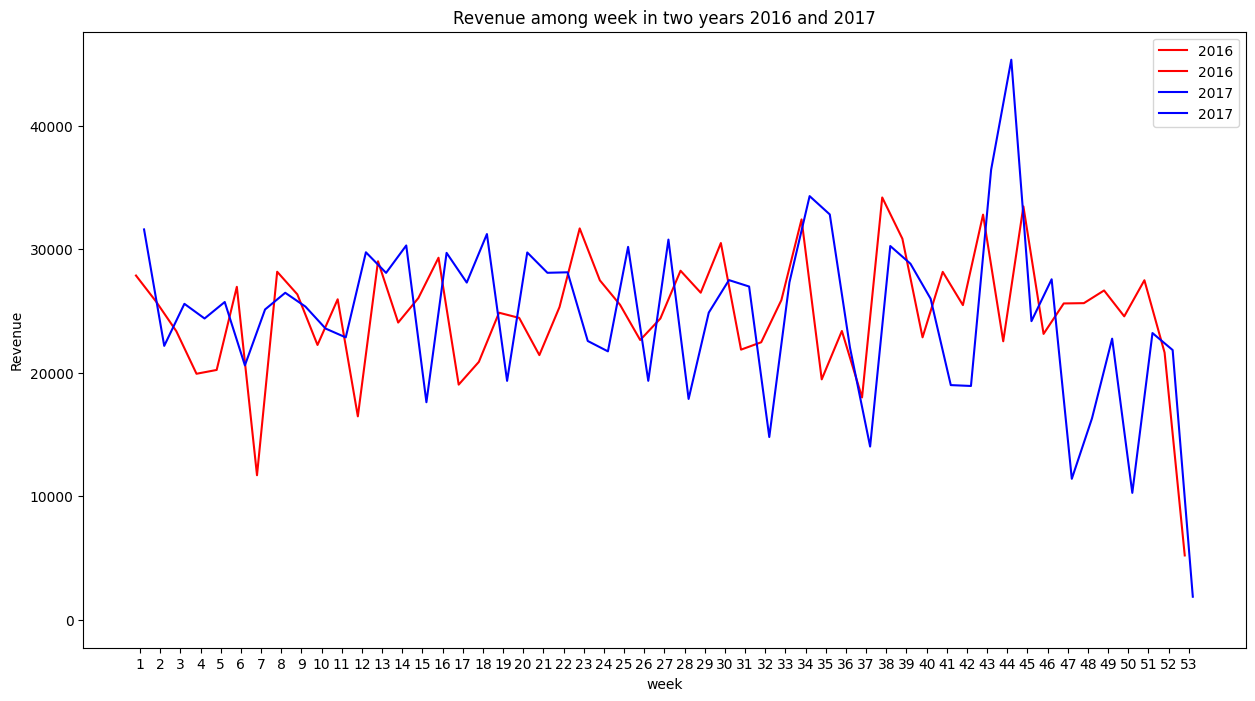

In [38]:
line_chart(profit_week_2016, profit_week_2017, "week")

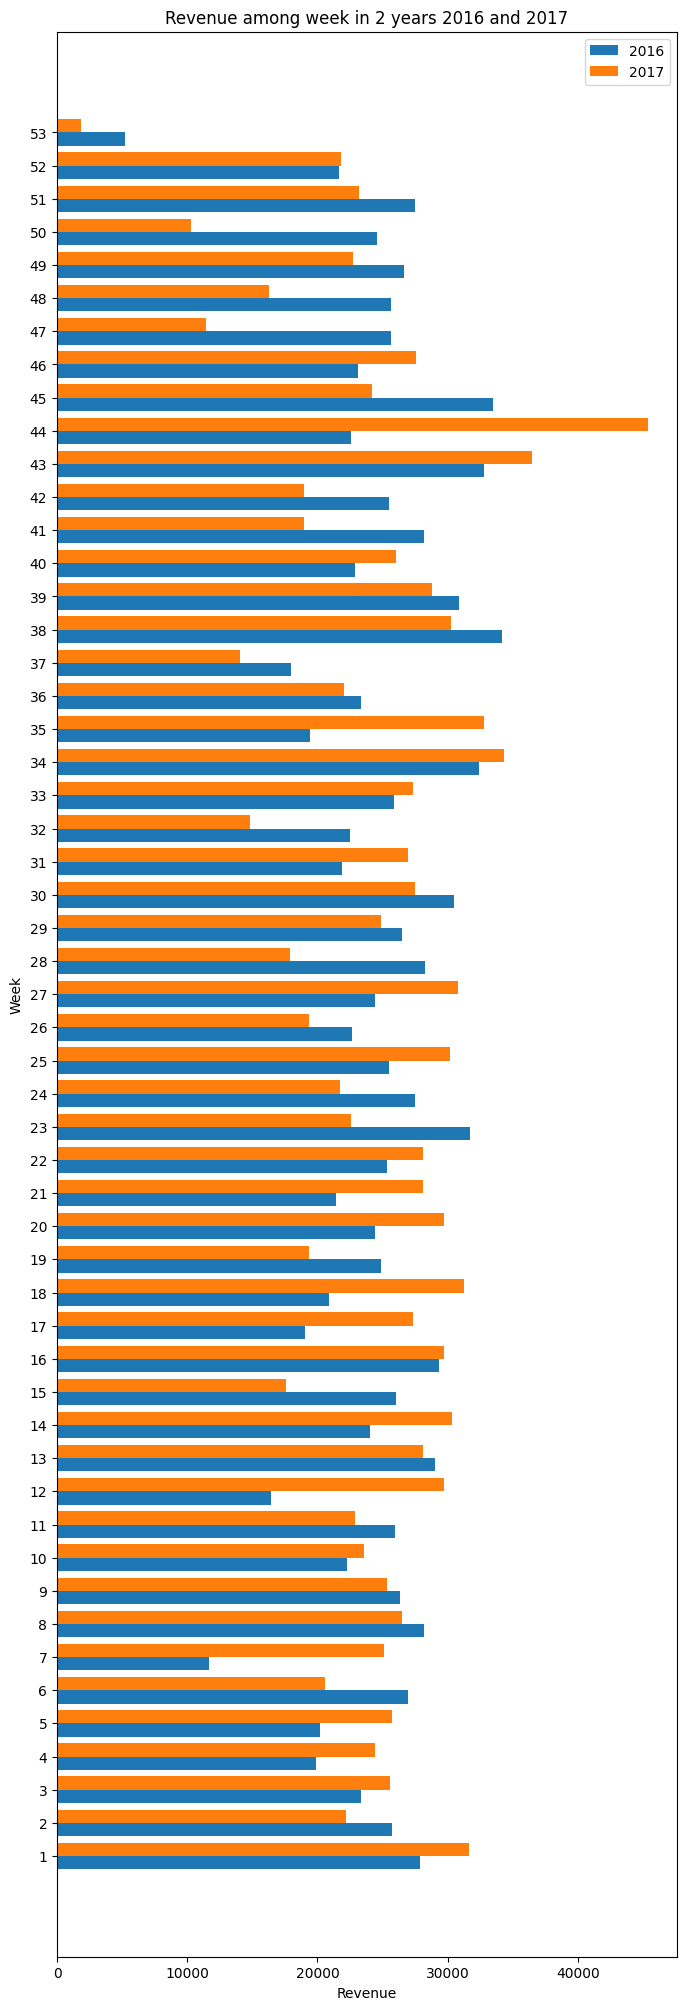

In [41]:
bar_chart(profit_week_2016, profit_week_2017, "week")

In [42]:
profit_week_us = df[(df["year"] == 2016) & (df["customer_country"] == "United States")].groupby(["week"]).sum()["profit_per_order"]
profit_week_pr = df[(df["year"] == 2016) & (df["customer_country"] == "Puerto Rico")].groupby(["week"]).sum()["profit_per_order"]

<ipython-input-42-ff55093e2a78>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_week_us = df[(df["year"] == 2016) & (df["customer_country"] == "United States")].groupby(["week"]).sum()["profit_per_order"]
<ipython-input-42-ff55093e2a78>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_week_pr = df[(df["year"] == 2016) & (df["customer_country"] == "Puerto Rico")].groupby(["week"]).sum()["profit_per_order"]


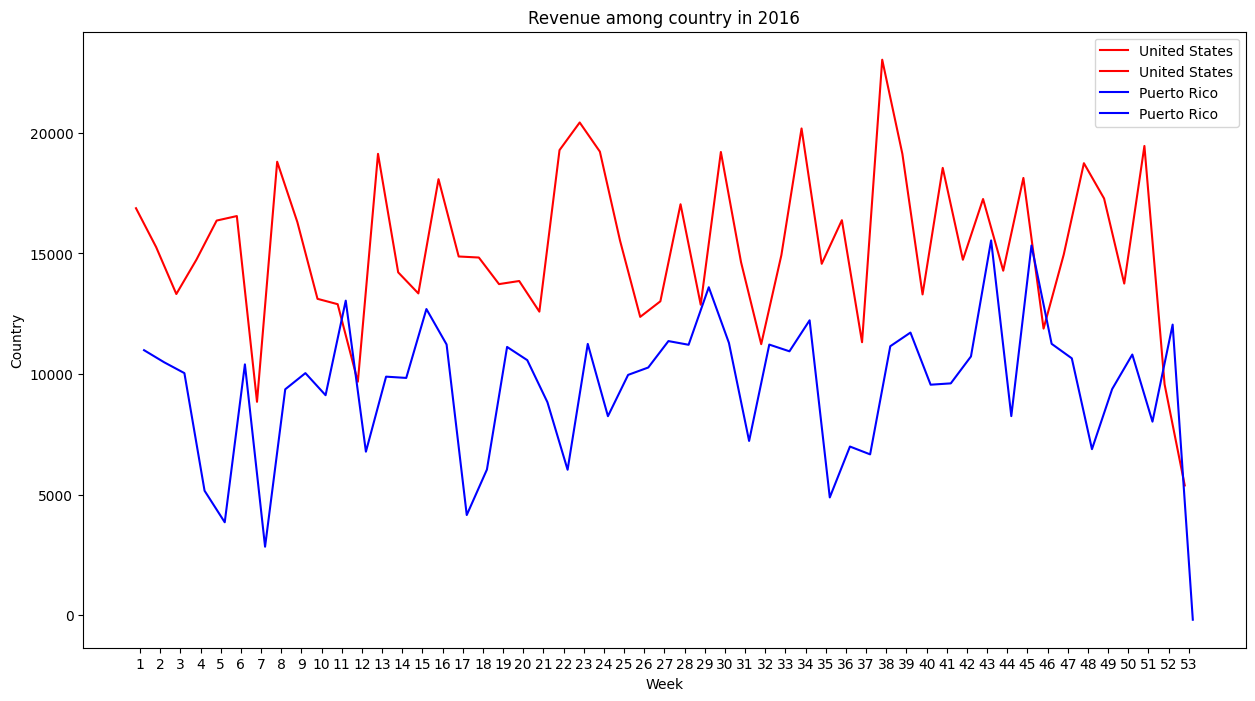

In [44]:
week = profit_week_us.keys()

axis = np.arange(len(week))

plt.plot(axis - 0.2, profit_week_us.values, 0.4, label="United States", c='red')
plt.plot(axis + 0.2, profit_week_pr.values, 0.4, label="Puerto Rico", c="blue")

plt.xticks(axis, week)
plt.xlabel("Week")
plt.ylabel("Country")
plt.title(f"Revenue among country in 2016")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 8)
plt.show()

## AMONG MONTH

In [54]:
profit_mon_2016 = df[df["year"] == 2016].groupby(["month"]).sum()["profit_per_order"]
profit_mon_2017 = df[df["year"] == 2017].groupby(["month"]).sum()["profit_per_order"]

<ipython-input-54-e5c9ff32ad86>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_mon_2016 = df[df["year"] == 2016].groupby(["month"]).sum()["profit_per_order"]
<ipython-input-54-e5c9ff32ad86>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_mon_2017 = df[df["year"] == 2017].groupby(["month"]).sum()["profit_per_order"]


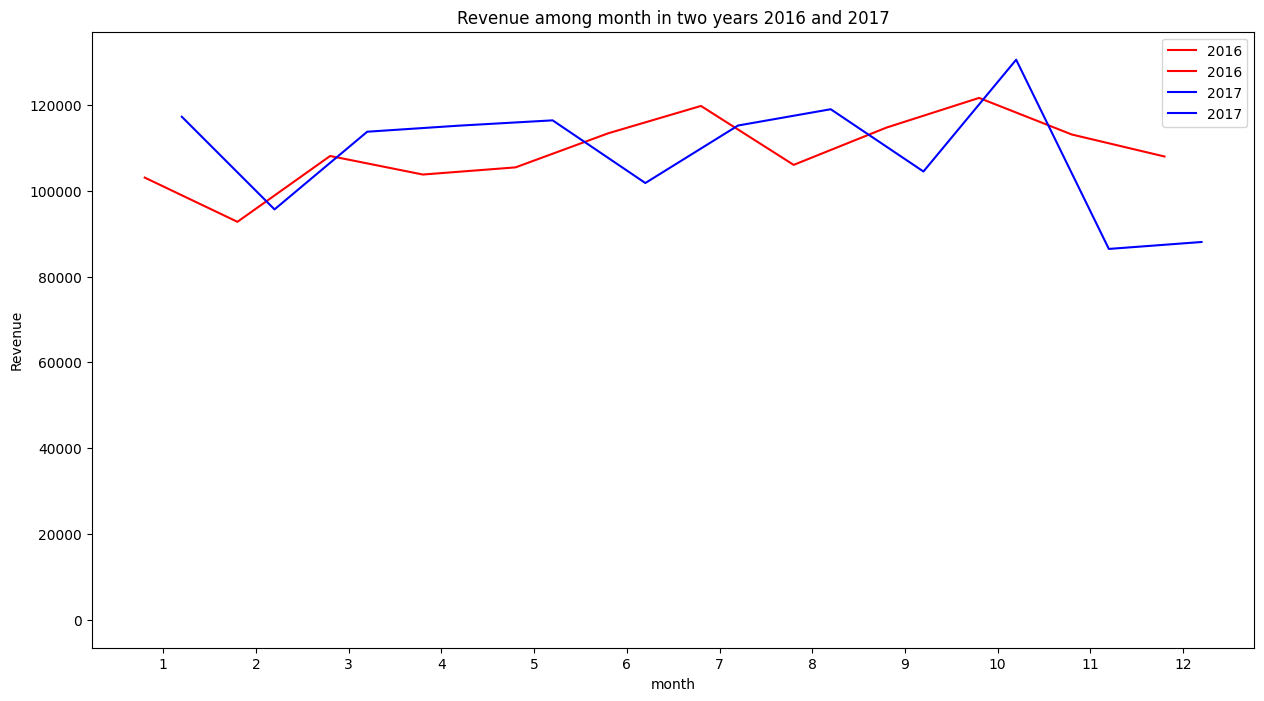

In [55]:
line_chart(profit_mon_2016, profit_mon_2017, "month")

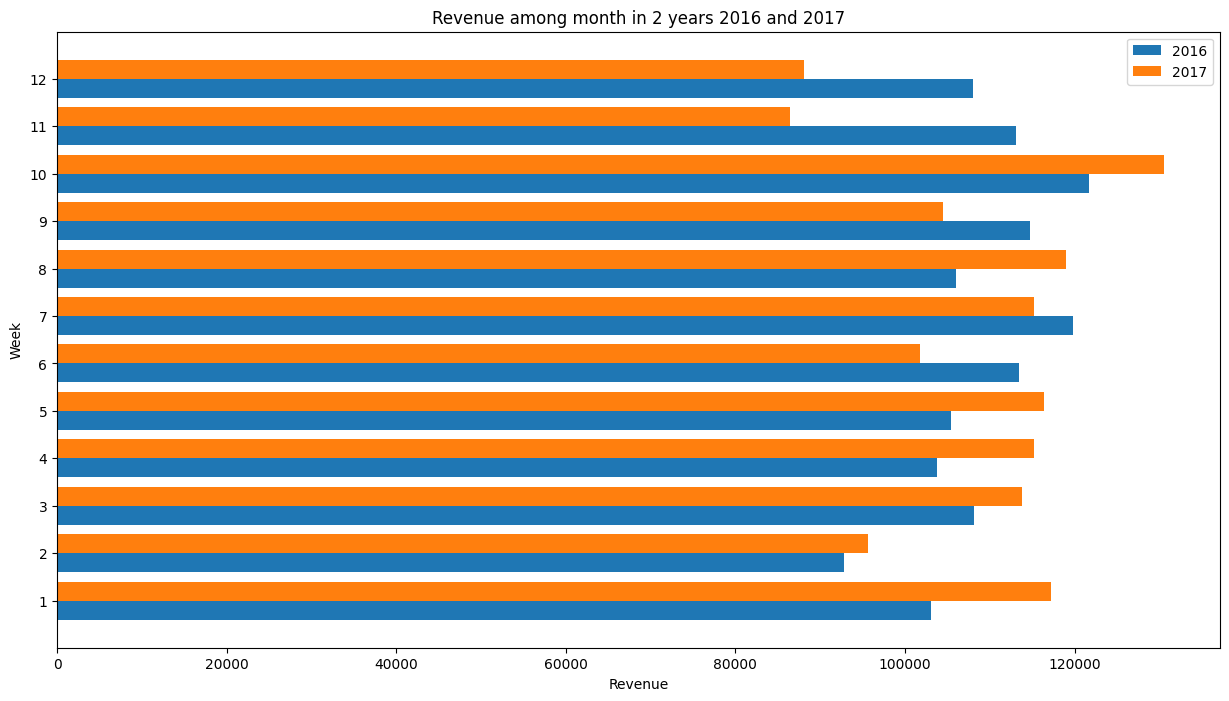

In [56]:
bar_chart(profit_mon_2016, profit_mon_2017, "month")

In [61]:
profit_month_us = df[(df["year"] == 2016) & (df["customer_country"] == "United States")].groupby(["month"]).sum()["profit_per_order"]
profit_month_pr = df[(df["year"] == 2016) & (df["customer_country"] == "Puerto Rico")].groupby(["month"]).sum()["profit_per_order"]

<ipython-input-61-beae0677e45a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_month_us = df[(df["year"] == 2016) & (df["customer_country"] == "United States")].groupby(["month"]).sum()["profit_per_order"]
<ipython-input-61-beae0677e45a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_month_pr = df[(df["year"] == 2016) & (df["customer_country"] == "Puerto Rico")].groupby(["month"]).sum()["profit_per_order"]


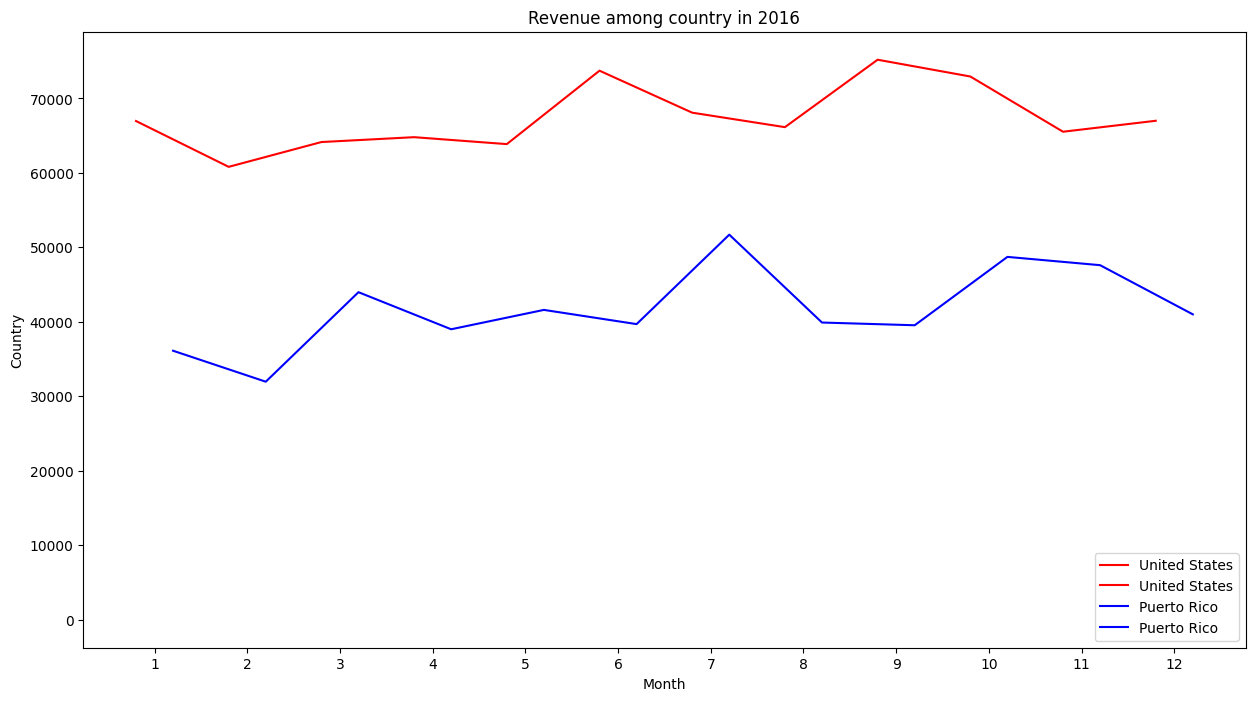

In [63]:
month = profit_month_us.keys()

axis = np.arange(len(month))

plt.plot(axis - 0.2, profit_month_us.values, 0.4, label="United States", c='red')
plt.plot(axis + 0.2, profit_month_pr.values, 0.4, label="Puerto Rico", c="blue")

plt.xticks(axis, month)
plt.xlabel("Month")
plt.ylabel("Country")
plt.title(f"Revenue among country in 2016")
plt.legend()
plt.rcParams["figure.figsize"] = (15, 8)
plt.show()

## REVENUE AMONG CATEGORY

In [64]:
profit_cate_2016 = df[df["year"] == 2016].groupby(["category_name"]).sum()["profit_per_order"]
profit_cate_2017 = df[df["year"] == 2017].groupby(["category_name"]).sum()["profit_per_order"]

<ipython-input-64-e3582920dcd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_cate_2016 = df[df["year"] == 2016].groupby(["category_name"]).sum()["profit_per_order"]
<ipython-input-64-e3582920dcd1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_cate_2017 = df[df["year"] == 2017].groupby(["category_name"]).sum()["profit_per_order"]


In [65]:
tmp = profit_cate_2016
for k, v in profit_cate_2017.items():
    if not k in profit_cate_2016:
        profit_cate_2016[k] = 0

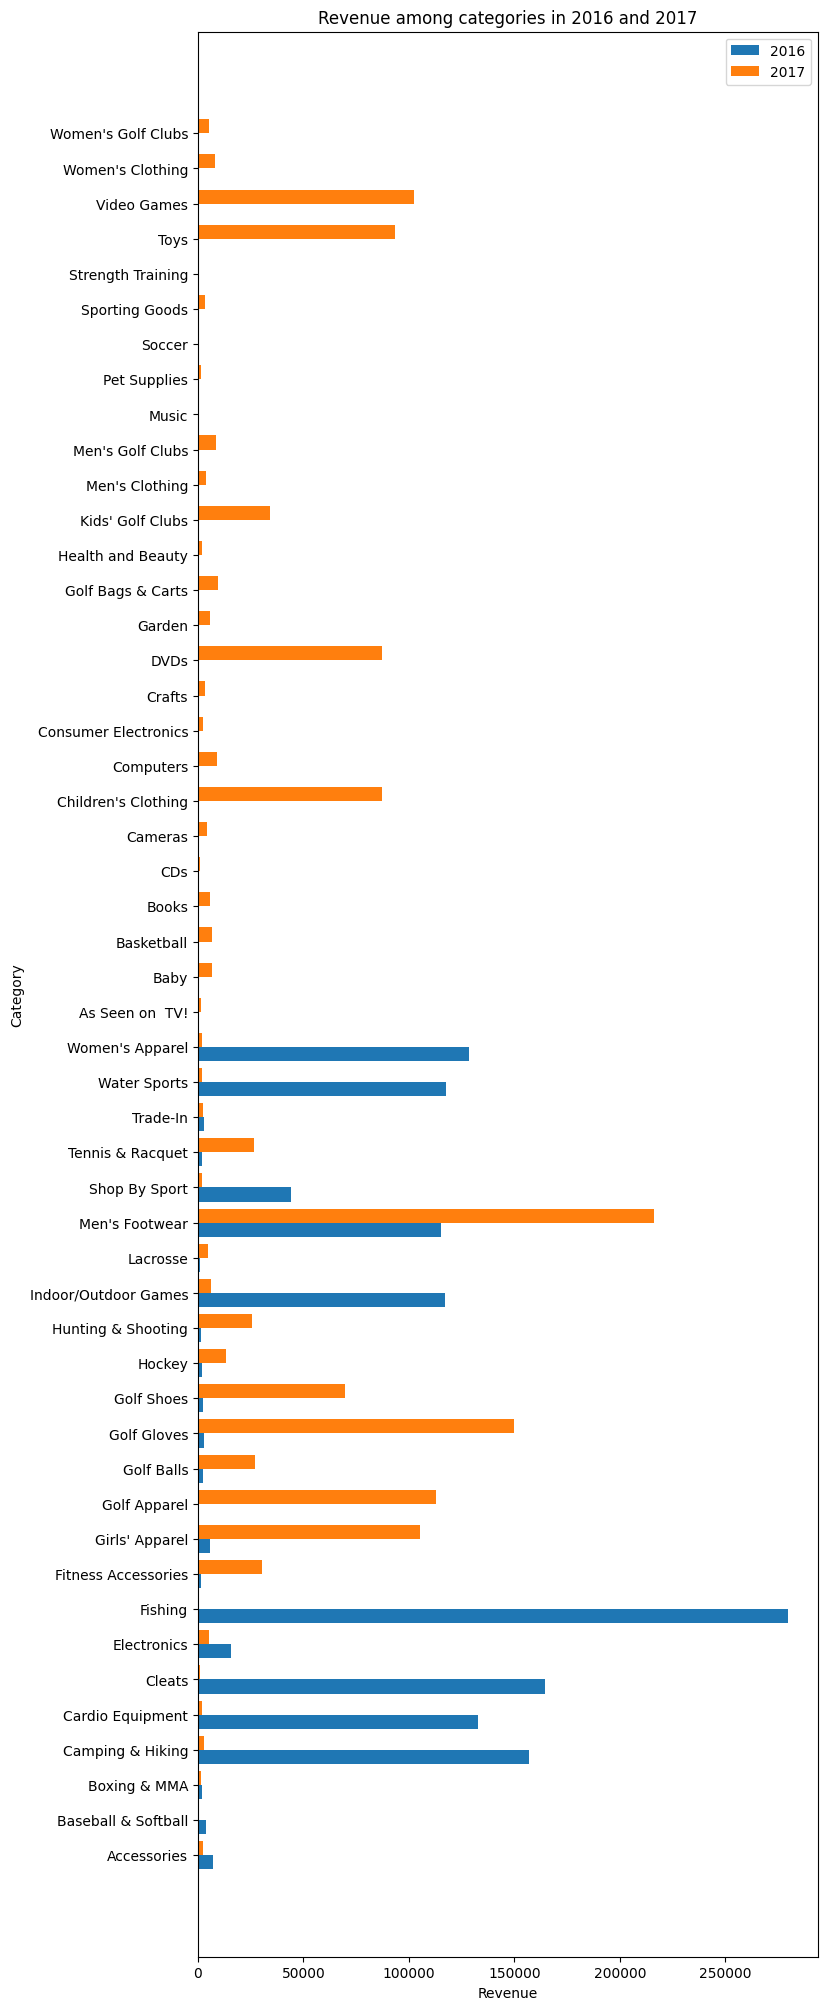

In [67]:
week = profit_cate_2016.keys()

axis = np.arange(len(week))

plt.barh(axis - 0.2 , profit_cate_2016.values, 0.4, label="2016")
plt.barh(axis + 0.2, profit_cate_2017.values, 0.4, label="2017")

plt.yticks(axis, week)
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.title(f"Revenue among categories in 2016 and 2017")
plt.legend()

plt.rcParams["figure.figsize"] = (8,25)

plt.show()

## REVENUE AMONG CUSTOMER SEGMENT


In [68]:
profit_cust_2016 = df[df["year"] == 2016].groupby(["customer_segment"]).sum()["profit_per_order"]
profit_cust_2017 = df[df["year"] == 2017].groupby(["customer_segment"]).sum()["profit_per_order"]

<ipython-input-68-663fb7ebc143>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_cust_2016 = df[df["year"] == 2016].groupby(["customer_segment"]).sum()["profit_per_order"]
<ipython-input-68-663fb7ebc143>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_cust_2017 = df[df["year"] == 2017].groupby(["customer_segment"]).sum()["profit_per_order"]


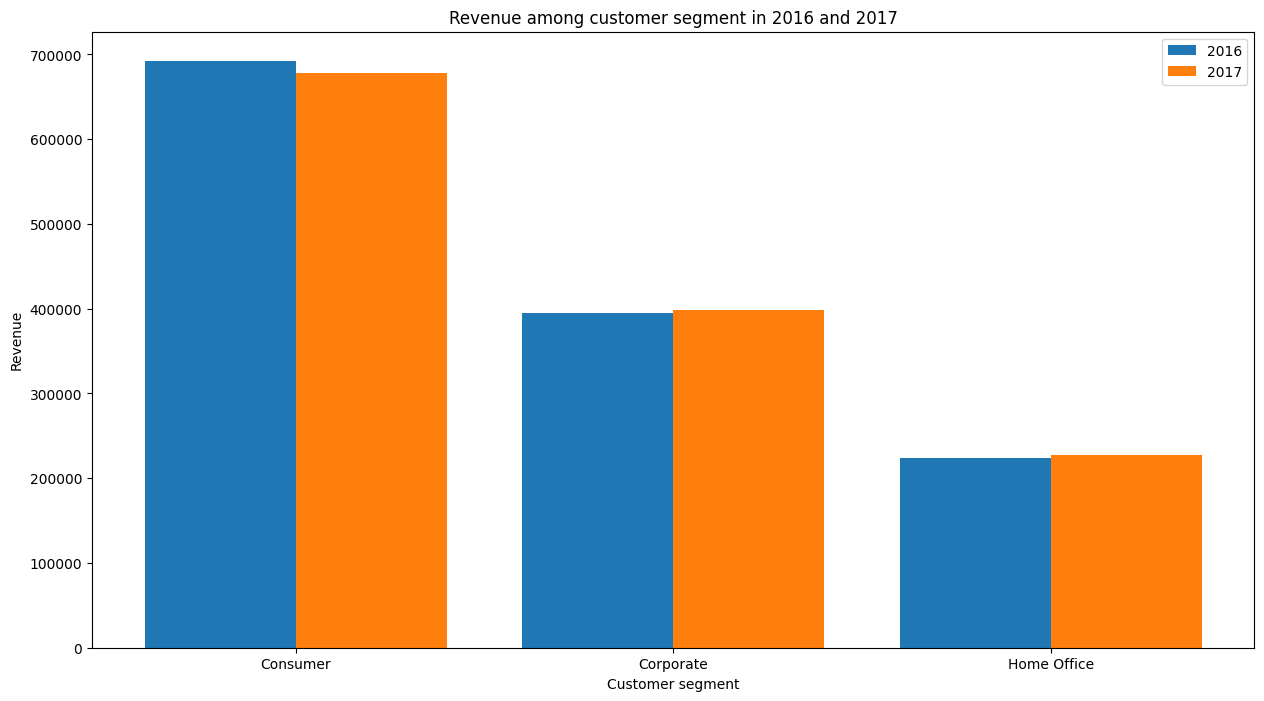

In [70]:
week = profit_cust_2016.keys()

axis = np.arange(len(week))

plt.bar(axis - 0.2 , profit_cust_2016.values, 0.4, label="2016")
plt.bar(axis + 0.2, profit_cust_2017.values, 0.4, label="2017")

plt.xticks(axis, week)
plt.xlabel("Customer segment")
plt.ylabel("Revenue")
plt.title(f"Revenue among customer segment in 2016 and 2017")
plt.legend()

plt.rcParams["figure.figsize"] = (15, 8)

plt.show()